<a href="https://colab.research.google.com/github/pradeepverma21/Machine-Learning-Project/blob/main/Traffic_Sign_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pradeepverma21","key":"bd531308a635c75470b6a9cc6847f477"}'}

In [3]:
#Installing kaggle API Client
!pip install -q kaggle

In [4]:
!mkdir -p ~/.kaggle/
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!mkdir traffic_sign_dataset
%cd traffic_sign_dataset

/content/traffic_sign_dataset


In [6]:
!kaggle datasets list -s gtsrb-german-traffic-sign

ref                                                                title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meowmeowmeowmeowmeow/gtsrb-german-traffic-sign                     GTSRB - German Traffic Sign Recognition Benchmark  612MB  2018-11-25 18:12:34         115260       1143  0.8235294        
valentynsichkar/traffic-signs-preprocessed                         Traffic Signs Preprocessed                           4GB  2019-08-31 18:22:11          15142        290  1.0              
harbhajansingh21/german-traffic-sign-dataset                       German Traffic Sign Dataset                        118MB  2023-07-11 04:21:24           1205         32  1.0              
ibrahimkaratas/gtsrb-german-traffic-sign-recogniti

In [7]:
!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
%cd ..

Dataset URL: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
License(s): CC0-1.0
100% 612M/612M [00:11<00:00, 119MB/s] 
100% 612M/612M [00:11<00:00, 56.6MB/s]
/content


In [ ]:
!unzip traffic_sign_dataset/gtsrb-german-traffic-sign.zip -d traffic_sign_dataset
!rm traffic_sign_dataset/gtsrb-german-traffic-sign.zip
!rm -rf traffic_sign_dataset/Meta
!rm -rf traffic_sign_dataset/meta
!rm -rf traffic_sign_dataset/test
!rm -rf traffic_sign_dataset/train
!rm traffic_sign_dataset/Meta.csv

Streaming output truncated to the last 5000 lines.
  inflating: traffic_sign_dataset/Train/5/00005_00050_00007.png  
  inflating: traffic_sign_dataset/Train/5/00005_00050_00008.png  
  inflating: traffic_sign_dataset/Train/5/00005_00050_00009.png  
  inflating: traffic_sign_dataset/Train/5/00005_00050_00010.png  
  inflating: traffic_sign_dataset/Train/5/00005_00050_00011.png  
  inflating: traffic_sign_dataset/Train/5/00005_00050_00012.png  
  inflating: traffic_sign_dataset/Train/5/00005_00050_00013.png  
  inflating: traffic_sign_dataset/Train/5/00005_00050_00014.png  
  inflating: traffic_sign_dataset/Train/5/00005_00050_00015.png  
  inflating: traffic_sign_dataset/Train/5/00005_00050_00016.png  
  inflating: traffic_sign_dataset/Train/5/00005_00050_00017.png  
  inflating: traffic_sign_dataset/Train/5/00005_00050_00018.png  
  inflating: traffic_sign_dataset/Train/5/00005_00050_00019.png  
  inflating: traffic_sign_dataset/Train/5/00005_00050_00020.png  
  inflating: traffic_sign

In [9]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import random
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D

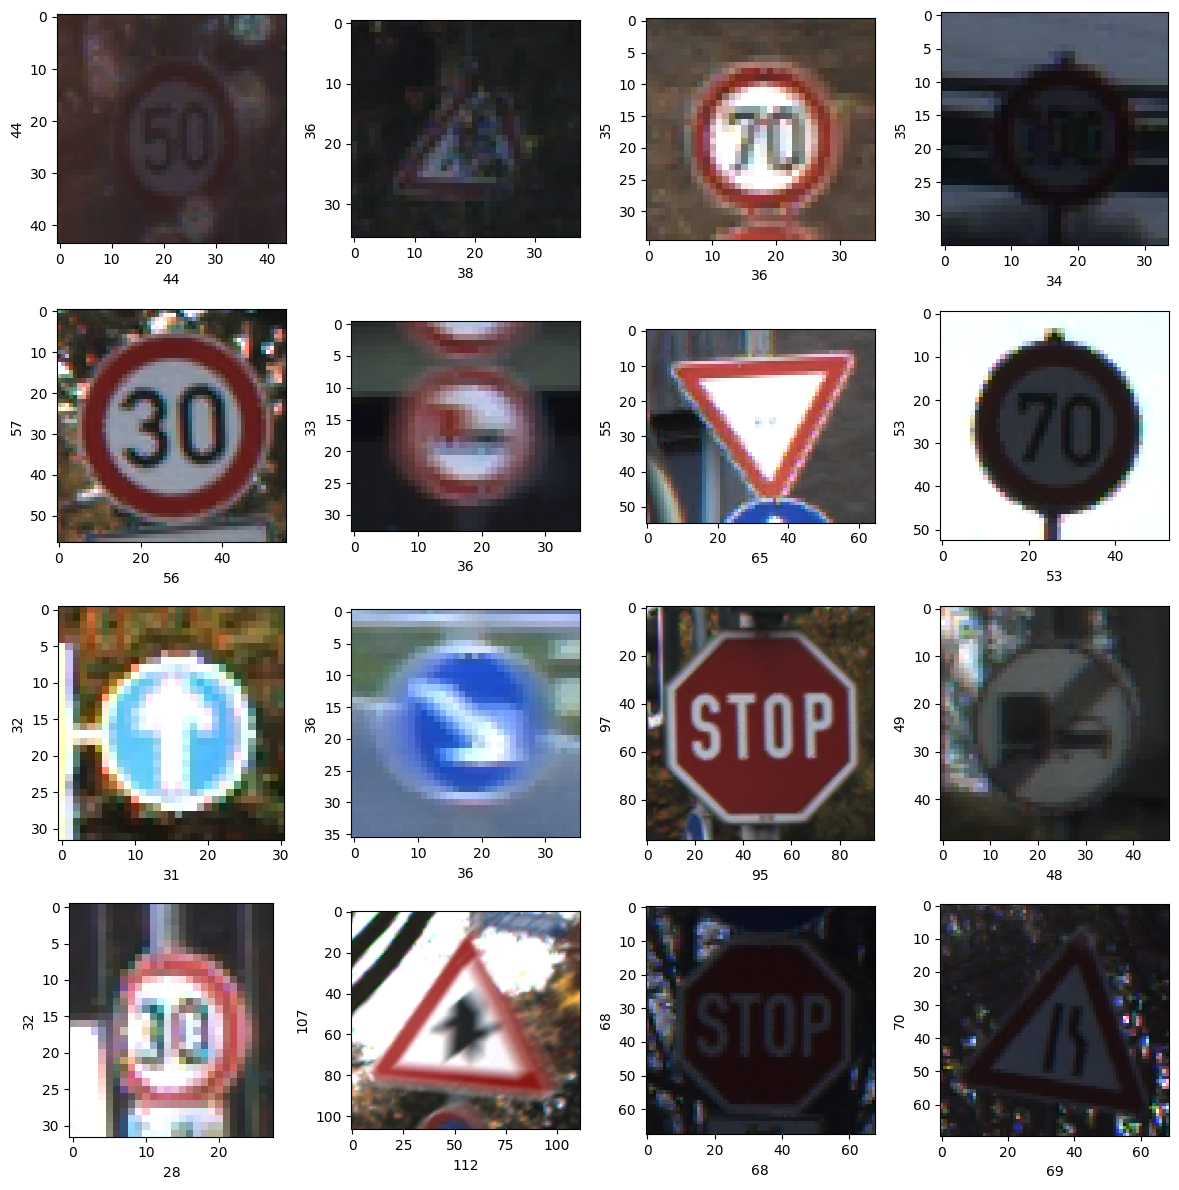

In [10]:
plt.figure(figsize=(12,12))
path = "traffic_sign_dataset/Test"

for i in range(1,17):
  plt.subplot(4,4,i)
  plt.tight_layout()
  rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1],fontsize=10)
  plt.ylabel(rand_img.shape[0], fontsize=10)


In [16]:
dim1 = []
dim2 = []

for i in range(0,43):
  labels = "traffic_sign_dataset/Train" + '/{0}'.format(i)
  image_path = os.listdir(labels)
  for x in image_path:
    img = imread(labels + '/' + x)
    dim1.append(img.shape[0])
    dim2.append(img.shape[1])

In [17]:
print("Dimension 1 Mean : ",np.mean(dim1))
print("Dimension 2 Mean : ",np.mean(dim2))

Dimension 1 Mean :  50.328929582493814
Dimension 2 Mean :  50.83587951745773


In [20]:
images = []
label_id = []

for i in range(43):
  labels = "traffic_sign_dataset/Train" + '/{0}'.format(i)
  image_path = os.listdir(labels)
  for x in image_path:
    img = Image.open(labels + '/' + x)
    img = img.resize((50,50))
    img = np.array(img)
    images.append(img)
    label_id.append(i)

In [21]:
images  = np.array(images)
images = images/255

In [22]:
label_id = np.array(label_id)
label_id.shape

(39209,)

In [23]:
images.shape

(39209, 50, 50, 3)

In [24]:
label_counts = pd.DataFrame(label_id).value_counts()
label_counts.head()

,count
0,
2,2250
1,2220
13,2160
12,2100
38,2070


In [25]:
x_train, x_val, y_train, y_val = train_test_split(images, label_id, test_size=0.2, random_state=42)

In [26]:
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

In [28]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same',input_shape=x_train.shape[1:]))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(43, activation='softmax'))

In [29]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 50, 50, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 23, 23, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7744)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         991,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 43)                  │           5,547 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,035,627 (3.95 MB)

 Trainable params: 1,035,627 (3.95 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.fit(x_train, y_train, epochs=10, batch_size=128,validation_data=(x_val, y_val), verbose=2)

Epoch 1/10
246/246 - 272s - 1s/step - accuracy: 0.4191 - loss: 1.9903 - val_accuracy: 0.7358 - val_loss: 1.0325
Epoch 2/10
246/246 - 247s - 1s/step - accuracy: 0.6535 - loss: 1.0810 - val_accuracy: 0.9002 - val_loss: 0.4768
Epoch 3/10
246/246 - 264s - 1s/step - accuracy: 0.7548 - loss: 0.7439 - val_accuracy: 0.9434 - val_loss: 0.2657
Epoch 4/10
246/246 - 247s - 1s/step - accuracy: 0.8092 - loss: 0.5798 - val_accuracy: 0.9607 - val_loss: 0.2010
Epoch 5/10
246/246 - 263s - 1s/step - accuracy: 0.8394 - loss: 0.4945 - val_accuracy: 0.9717 - val_loss: 0.1436
Epoch 6/10
246/246 - 244s - 991ms/step - accuracy: 0.8556 - loss: 0.4424 - val_accuracy: 0.9781 - val_loss: 0.1312
Epoch 7/10
246/246 - 248s - 1s/step - accuracy: 0.8697 - loss: 0.3948 - val_accuracy: 0.9839 - val_loss: 0.1025
Epoch 8/10
246/246 - 263s - 1s/step - accuracy: 0.8847 - loss: 0.3528 - val_accuracy: 0.9820 - val_loss: 0.0915
Epoch 9/10
246/246 - 260s - 1s/step - accuracy: 0.8937 - loss: 0.3216 - val_accuracy: 0.9872 - val_lo

<Axes: >

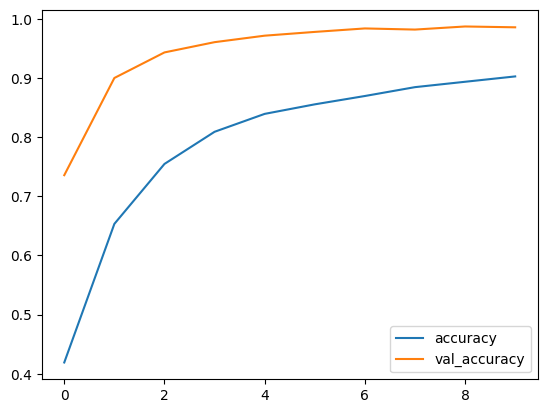

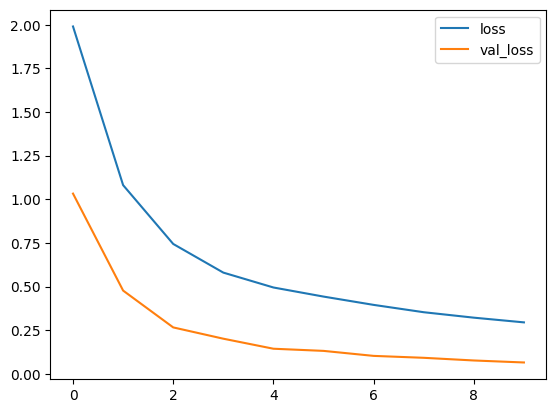

In [34]:
evaluation = pd.DataFrame(model.history.history)
evaluation[['accuracy','val_accuracy']].plot()
evaluation[['loss', 'val_loss']].plot()

In [35]:
test_path = "traffic_sign_dataset/Test"
!rm traffic_sign_dataset/Test/GT-final_test.csv

In [37]:
from PIL import Image

def scaling(test_images, test_path):
  images = []
  image_path = test_images
  for x in image_path:
    img = Image.open(test_path + '/' + x)
    img = img.resize((50,50))
    img = np.array(img)
    images.append(img)

    images  = np.array(images)
    images = images/255
    return images

In [38]:
test_images = scaling(sorted(os.listdir(test_path)), test_path)

In [39]:
test = pd.read_csv('traffic_sign_dataset/Test.csv')
y_test = test['ClassId'].values
y_test

array([16,  1, 38, ...,  6,  7, 10])

In [56]:
y_pred = model.predict(test_images)
y_pred = np.argmax(y_pred, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [73]:
all_labels = ['', 'speed limit (30km/h)', 'speed limit (50km/h)','speed limit (60km/h)', 'speed limit (70km/h)', 'speed limit (80km/h)',
              'end of speed limit (80km/h)', 'speed limit (100km/h)', 'speed limit (120km/h)', 'no passing', 'no passing veh over 3.5 tons',
              'right-of-way at intersection', 'priority road', 'Yield', 'stop', 'no vehicles', 'vehicles over 3.5 tons prohibited',
              'no entry', 'general caution', 'Dangerous curve left', 'Dangerous curve right', 'Double curve', 'Bumpy road', 'Slippery road',
              'Road narrows on the right', 'Road work', 'Traffic signals', 'Pedestrians', 'Children crossing', 'Bicycles crossing',
              'Beware of ice/snow', 'Wild animals crossing', 'End speed + passing limits', 'Turn right ahead', 'Turn left ahead',
              'Ahead only', 'Go straight or right', 'Go straight or left', 'Keep right', 'Keep left', 'Roundabout mandatory',
              'End of no passing', 'End no passing veh > 3.5 tons']


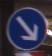

In [78]:
img = Image.open(test_path + '/00005.png')
img

In [80]:
print("Original label : ", all_labels[y_test[5]])

Original label :  Keep right
